# Final Project

Due Date:  11:59pm on Wednesday, December 7th

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from P201_Functions import *
import random

## Question 1 - Experiment Design 

In the Jupyter Notebook called Fitting_Examples.ipynb (you can find this in the ~/JupyterNotebooks/fitting directory), the last few examples considered cases where the uncertainty in the data became larger at small x-values. We considered three scenarios for collecting the data - one where we focused on small x-values, and two others that covered larger ranges of x.

For this question, begin with the Jupyter Notebook above, and modify it to consider 10 x-value ranges that keep the minimum value of the range constant (and fairly close to zero) while varying the maximum x-value from small to larger values. For each x-value range, calculate the uncertainty in the y-intercept, and then create a plot of the uncertainty as a function of that maximum x-value of the range.

Now, consider keeping the maximum x-value of the range constant, and vary the minimum value of the range from a small value, close to zero, to a larger value that is close to the maximum value. Create a plot of the uncertainty in the y-intercept as a function of the minimum x-value of the range.

What can you conclude from this study about the optimal experiment design?

In [2]:
# create some fake data

npts = 11
xlow = 0.25
# pick some generally arbitrary xhigh values from 1 to 1000
xhighs = [5,10,20,30,40,50,60,70,80,100]

x = [np.linspace(xlow,xhigh,npts) for xhigh in xhighs]
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)

# The "equation" that we will fit in all of these examples is the line y=x.  Thus, we expect,
# in all cases, a slope of 1 and a y-intercept of 0.

y = [xi + yrandom for xi in x]

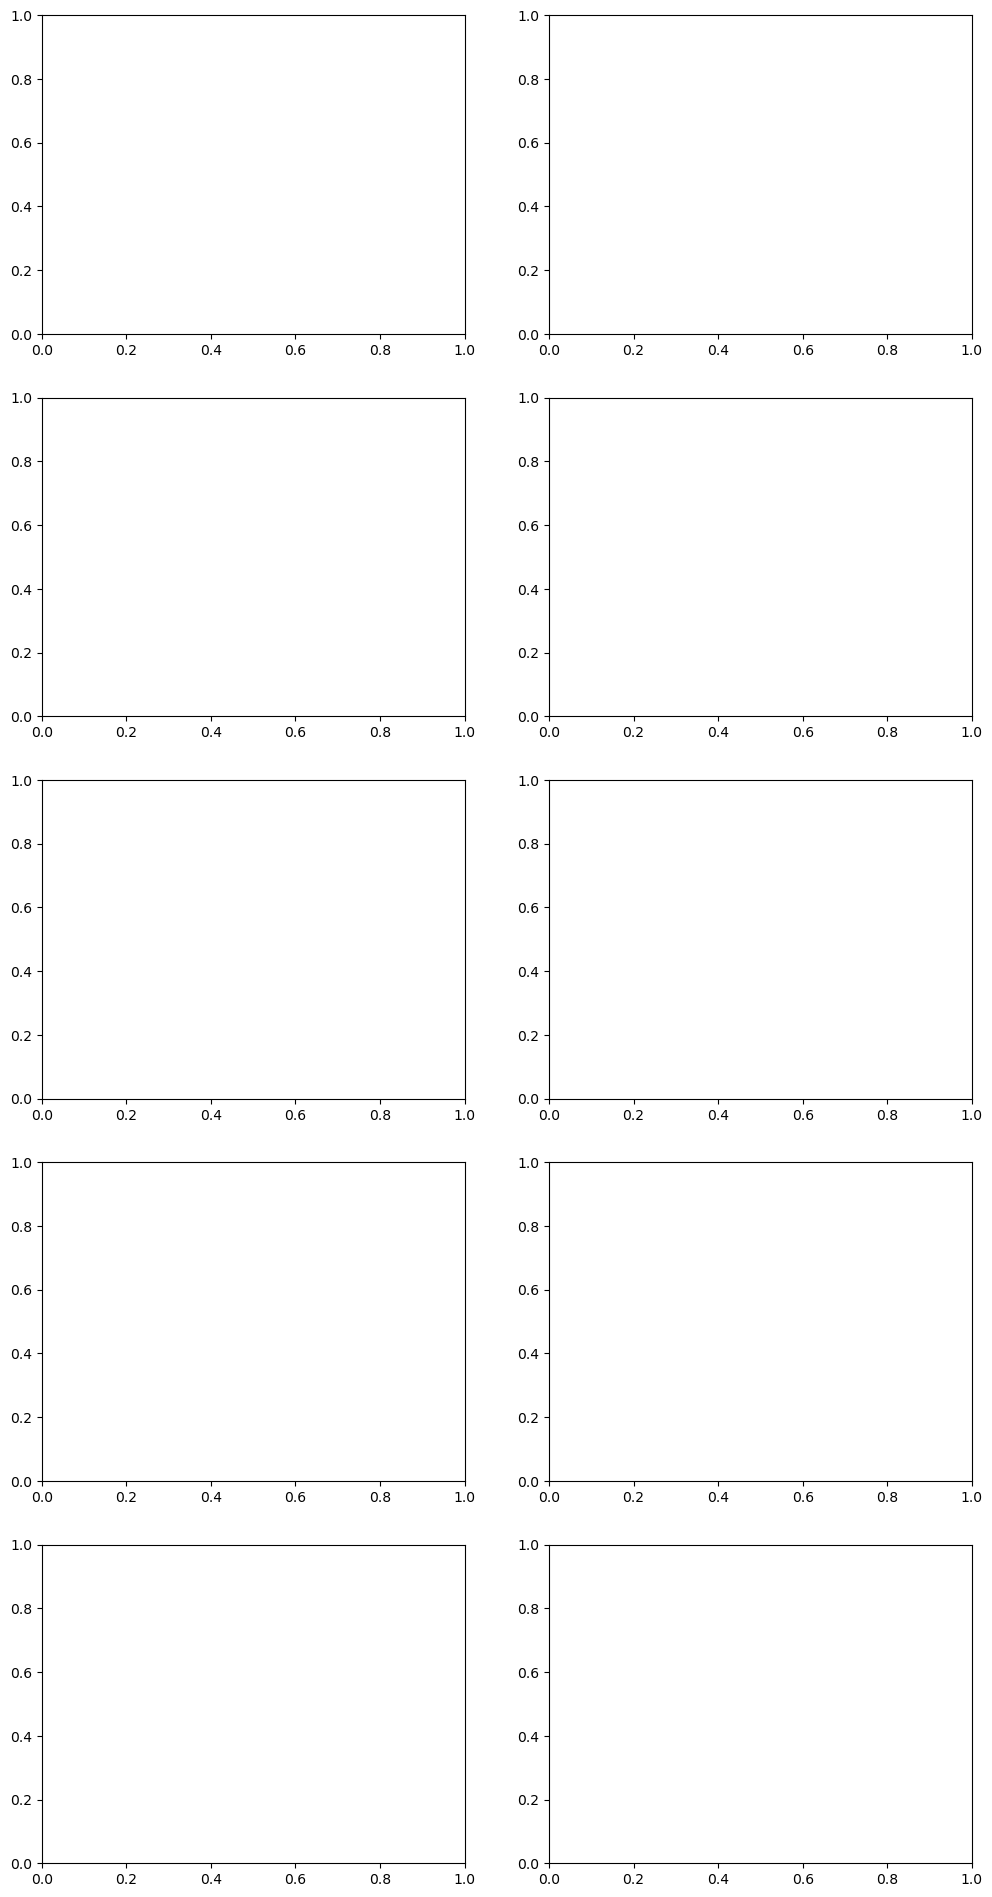

In [3]:
plt.rcParams["figure.figsize"] = (12,24)

figure, axis = plt.subplots(5, 2)
plot1 = plt.subplot2grid((5, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((5, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((5, 2), (2, 0), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((5, 2), (3, 0), rowspan=1, colspan=1)
plot5 = plt.subplot2grid((5, 2), (4, 0), rowspan=1, colspan=1)
plot6 = plt.subplot2grid((5, 2), (0, 1), rowspan=1, colspan=1)
plot7 = plt.subplot2grid((5, 2), (1, 1), rowspan=1, colspan=1)
plot8 = plt.subplot2grid((5, 2), (2, 1), rowspan=1, colspan=1)
plot9 = plt.subplot2grid((5, 2), (3, 1), rowspan=1, colspan=1)
plot10 = plt.subplot2grid((5, 2), (4, 1), rowspan=1, colspan=1)

plots = [plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10]

Linear Fit: Coefficients (from curve_fit)
[-0.00969291  0.98733818]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.01322942 -0.00379662]
 [-0.00379662  0.00144633]]

Linear Fit: Final Result: y = (0.98734 +/- 0.03803) x + (-0.00969 +/- 0.11502)

Linear Fit: Coefficients (from curve_fit)
[-0.01131622  0.99383142]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.01227968 -0.0017593 ]
 [-0.0017593   0.00034328]]

Linear Fit: Final Result: y = (0.99383 +/- 0.01853) x + (-0.01132 +/- 0.11081)

Linear Fit: Coefficients (from curve_fit)
[-0.01209704  0.99695475]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 1.18397304e-02 -8.47052995e-04]
 [-8.47052995e-04  8.36594825e-05]]

Linear Fit: Final Result: y = (0.99695 +/- 0.00915) x + (-0.01210 +/- 0.10881)

Linear Fit: Coefficients (from curve_fit)
[-0.01235293  0.99797836]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 1.16980362e-02 -5.57669980e-04]
 [-5.57669980e-04  3.68707640e-05]]

Linear Fit: Final Result: y = (0.99798 +/- 0

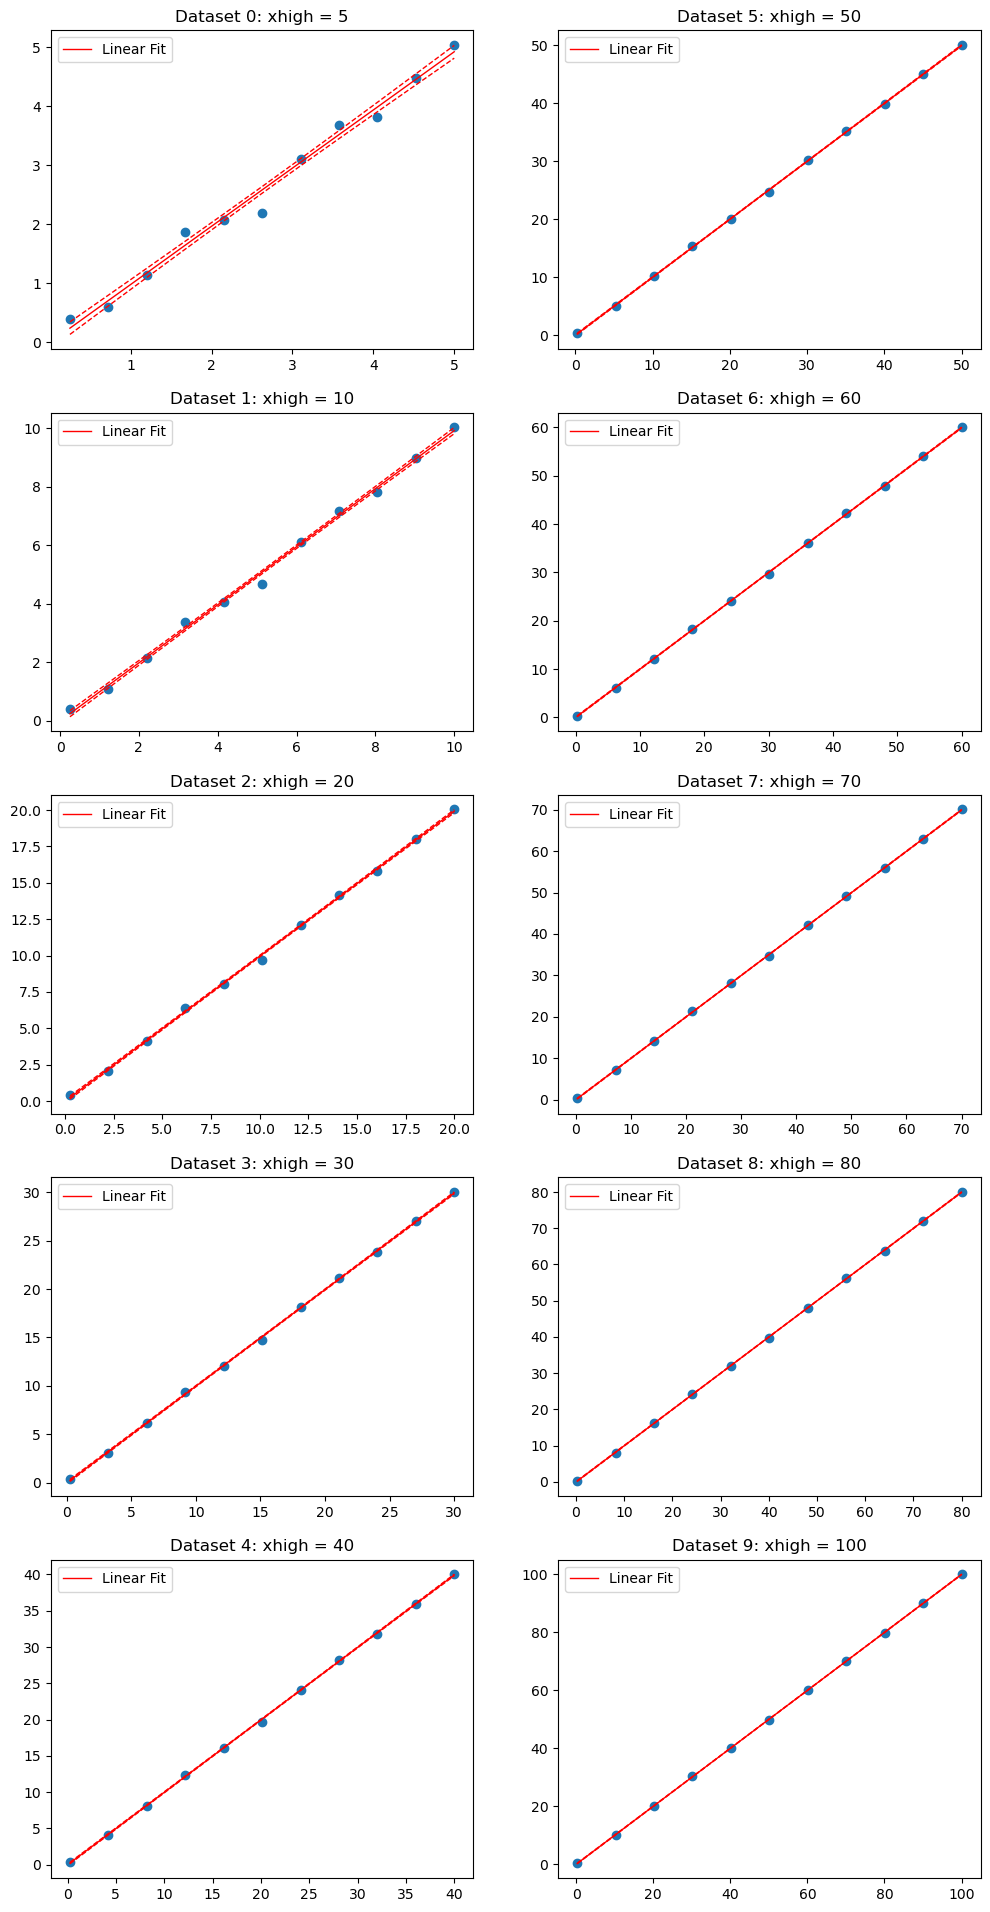

In [4]:
# Takes the x and y values to make a trendline
#
# The function called linear_fit_plot() is defined externally, and takes five parameters:
# 1. Vector of x data
# 2. Vector of y data
# 3. Name of the panel in which to plot the data
# 4. Low value of x to consider
# 5. High value of x to consider
#
# The function returns the y-intercept and slope, as well as the uncertainties in these values.

slope = []
dslope = []
yint = []
dyint = []
type = []

for i in range(10):
    plots[i].plot(x[i],y[i],'o')
    plots[i].set_title(f"Dataset {i}: xhigh = {xhighs[i]}")
    b, m, db, dm = linear_fit_plot(x[i],y[i],plots[i],0.0,xhighs[i]+1)
    plots[i].legend()
    slope.append(m)
    dslope.append(dm)
    yint.append(b)
    dyint.append(db)
    type.append('None')


# Plot the entire figure(s), which will now include the fit to the data
# The solid red line indicates the line of best fit, and the dashed lines indicate
# a 95% confidence band, based on the determined uncertainties.

figure

Text(0.5, 1.0, 'y-intercept uncertainty vs. maximum x value')

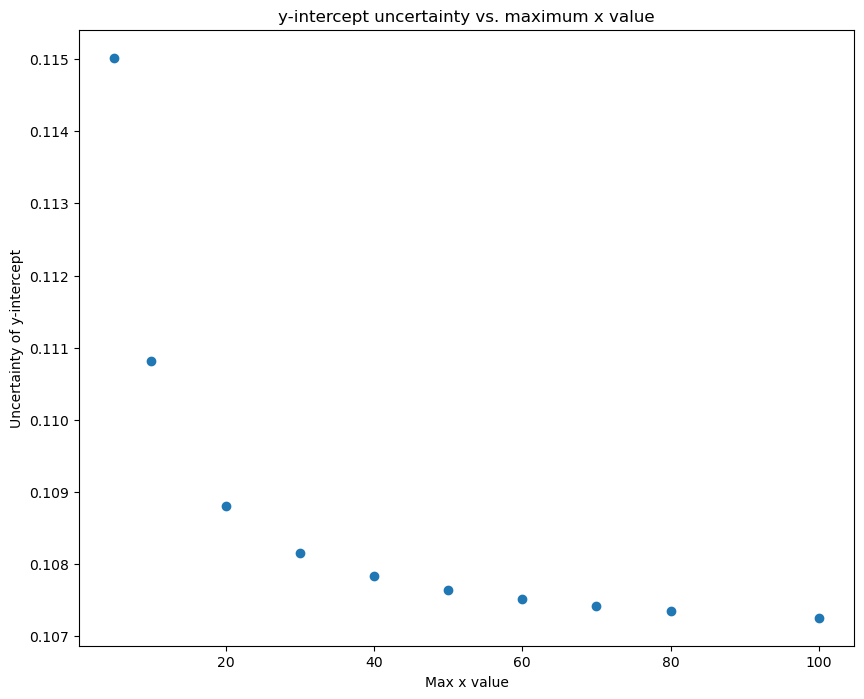

In [5]:
# Create plot of y-intercept uncertainty as a function of the maximum x value

plt.rcParams["figure.figsize"] = (10,8)

fig = plt.figure()
plt.plot(xhighs, dyint, 'o')
plt.xlabel("Max x value")
plt.ylabel("Uncertainty of y-intercept")
plt.title("y-intercept uncertainty vs. maximum x value")

In [6]:
# Do it again, but vary minimum x-value instead

# create some fake data

npts = 11
xlows = [0.5, 5, 10, 15, 20, 25, 30, 35, 40, 45]
# pick some generally arbitrary xhigh values from 1 to 1000
xhigh = 50

x = [np.linspace(xlow,xhigh,npts) for xlow in xlows]
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)

# The "equation" that we will fit in all of these examples is the line y=x.  Thus, we expect,
# in all cases, a slope of 1 and a y-intercept of 0.

y = [xi + yrandom for xi in x]

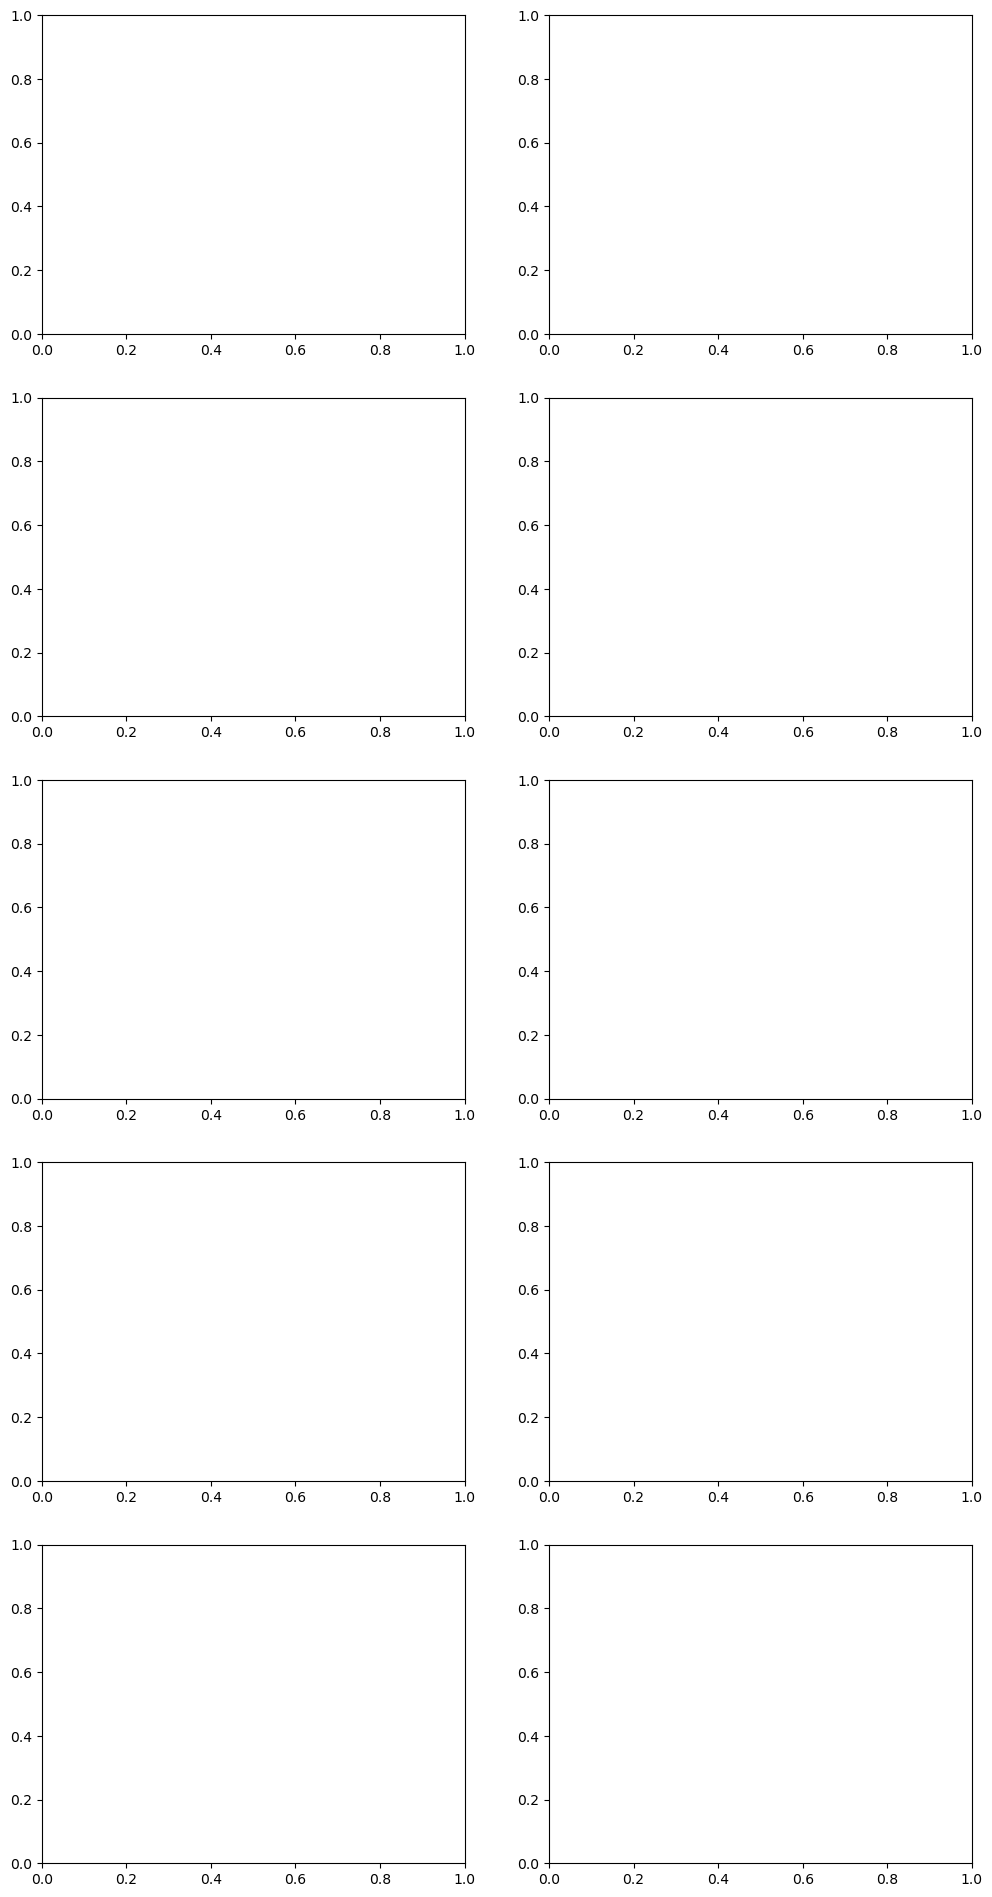

In [7]:
plt.rcParams["figure.figsize"] = (12,24)

figure, axis = plt.subplots(5, 2)
plot1 = plt.subplot2grid((5, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((5, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((5, 2), (2, 0), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((5, 2), (3, 0), rowspan=1, colspan=1)
plot5 = plt.subplot2grid((5, 2), (4, 0), rowspan=1, colspan=1)
plot6 = plt.subplot2grid((5, 2), (0, 1), rowspan=1, colspan=1)
plot7 = plt.subplot2grid((5, 2), (1, 1), rowspan=1, colspan=1)
plot8 = plt.subplot2grid((5, 2), (2, 1), rowspan=1, colspan=1)
plot9 = plt.subplot2grid((5, 2), (3, 1), rowspan=1, colspan=1)
plot10 = plt.subplot2grid((5, 2), (4, 1), rowspan=1, colspan=1)

plots = [plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10]

Linear Fit: Coefficients (from curve_fit)
[0.09147141 0.99573968]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 2.18027817e-02 -6.23758226e-04]
 [-6.23758226e-04  2.47033006e-05]]

Linear Fit: Final Result: y = (0.99574 +/- 0.00497) x + (0.09147 +/- 0.14766)

Linear Fit: Coefficients (from curve_fit)
[0.11277295 0.99531365]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 2.86578767e-02 -8.21998993e-04]
 [-8.21998993e-04  2.98908697e-05]]

Linear Fit: Final Result: y = (0.99531 +/- 0.00547) x + (0.11277 +/- 0.16929)

Linear Fit: Coefficients (from curve_fit)
[0.14206261 0.99472786]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 4.01004385e-02 -1.13491851e-03]
 [-1.13491851e-03  3.78306319e-05]]

Linear Fit: Final Result: y = (0.99473 +/- 0.00615) x + (0.14206 +/- 0.20025)

Linear Fit: Coefficients (from curve_fit)
[0.17972104 0.99397469]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 5.82435947e-02 -1.60586780e-03]
 [-1.60586780e-03  4.94113259e-05]]

Linear Fit: Final Resul

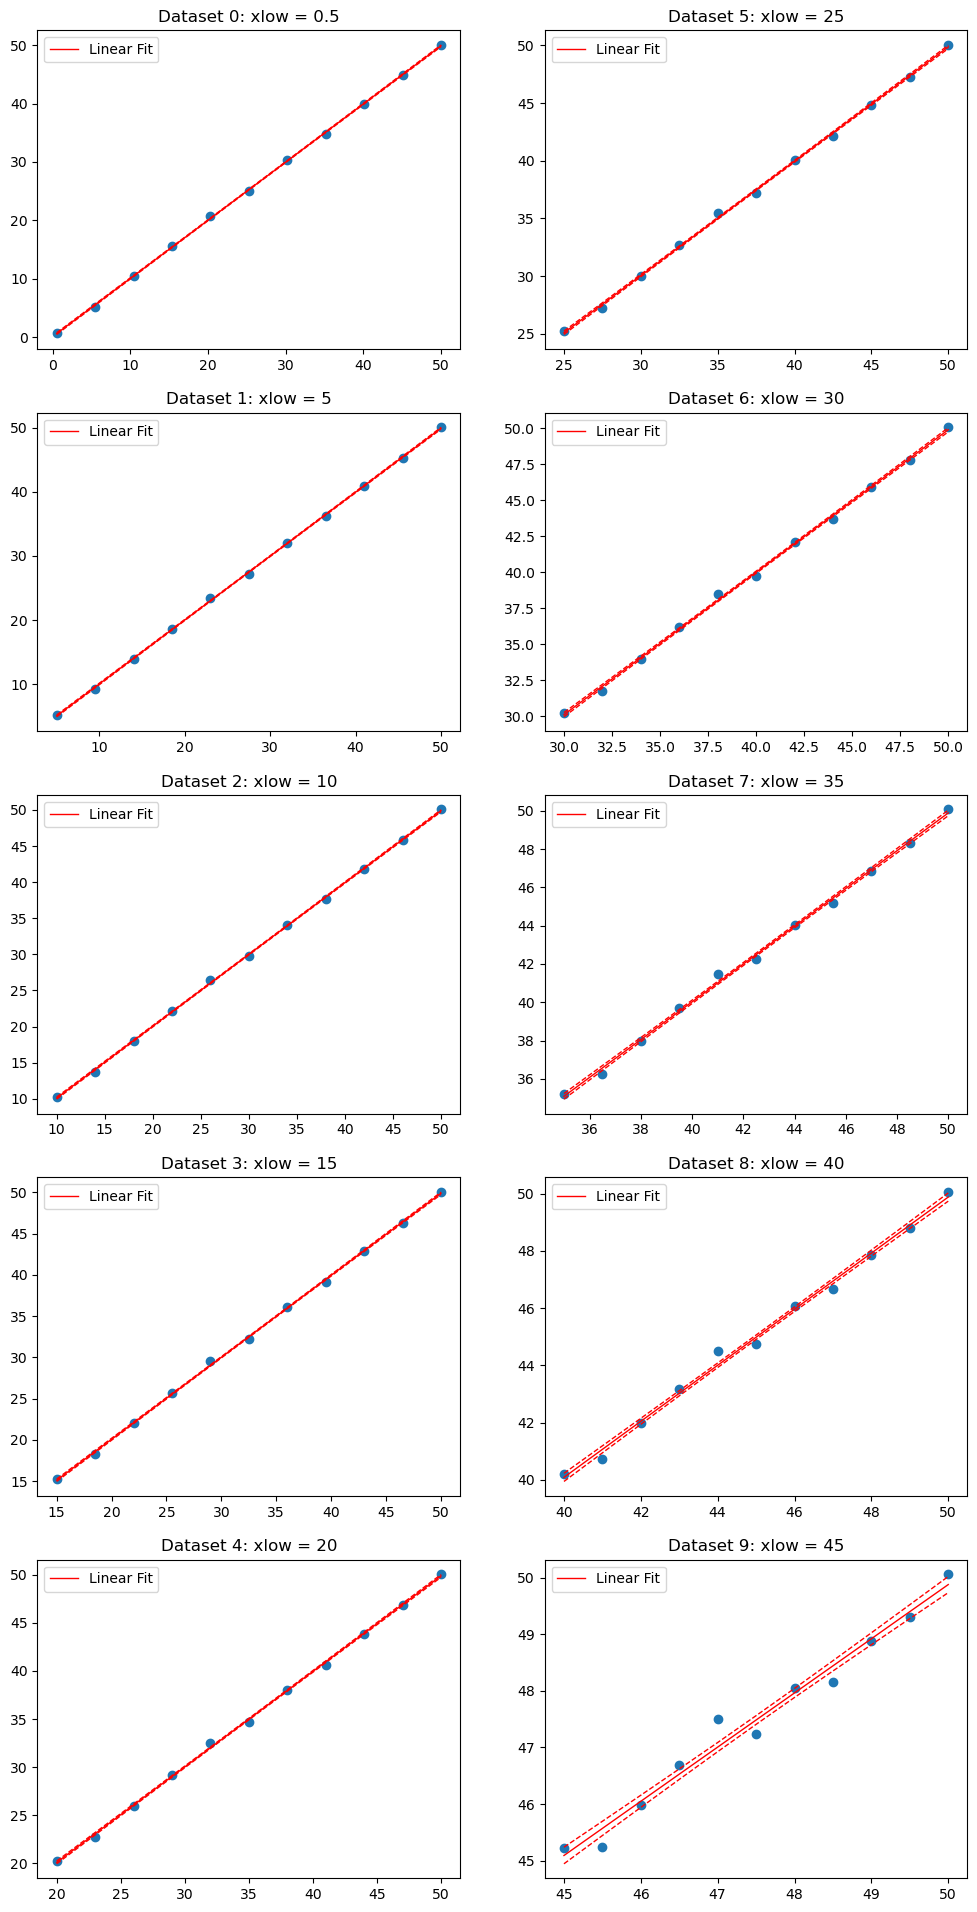

In [8]:
# Takes the x and y values to make a trendline
#
# The function called linear_fit_plot() is defined externally, and takes five parameters:
# 1. Vector of x data
# 2. Vector of y data
# 3. Name of the panel in which to plot the data
# 4. Low value of x to consider
# 5. High value of x to consider
#
# The function returns the y-intercept and slope, as well as the uncertainties in these values.

slope = []
dslope = []
yint = []
dyint = []
type = []

for i in range(10):
    plots[i].plot(x[i],y[i],'o')
    plots[i].set_title(f"Dataset {i}: xlow = {xlows[i]}")
    b, m, db, dm = linear_fit_plot(x[i],y[i],plots[i],xlows[i]-0.5,51)
    plots[i].legend()
    slope.append(m)
    dslope.append(dm)
    yint.append(b)
    dyint.append(db)
    type.append('None')


# Plot the entire figure(s), which will now include the fit to the data
# The solid red line indicates the line of best fit, and the dashed lines indicate
# a 95% confidence band, based on the determined uncertainties.

figure

Text(0.5, 1.0, 'y-intercept uncertainty vs. minimum x value')

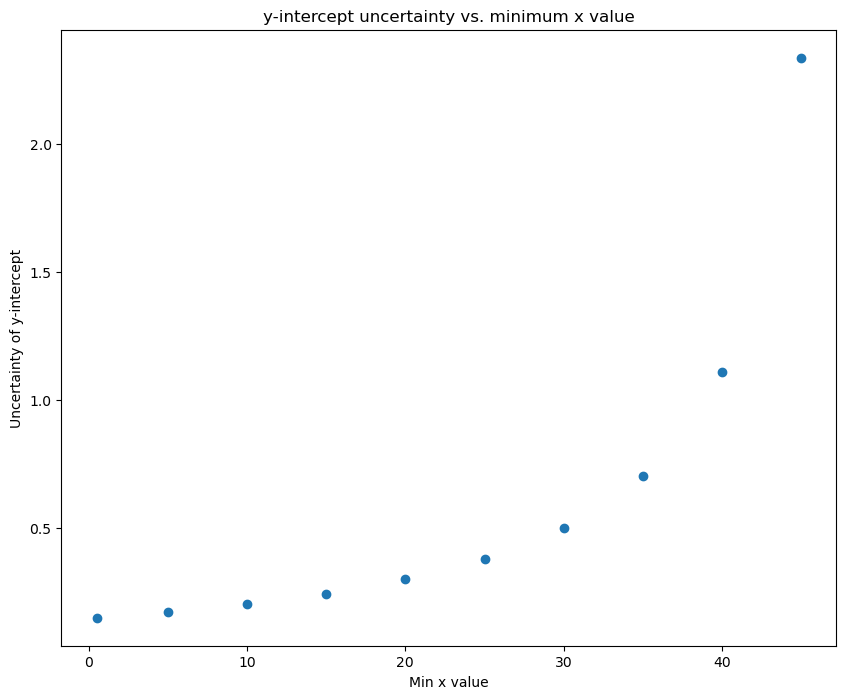

In [9]:
# Create plot of y-intercept uncertainty as a function of the minimum x value

plt.rcParams["figure.figsize"] = (10,8)

fig = plt.figure()
plt.plot(xlows, dyint, 'o')
plt.xlabel("Min x value")
plt.ylabel("Uncertainty of y-intercept")
plt.title("y-intercept uncertainty vs. minimum x value")

### What does this mean?

These plots show the importance of having a good range of data. As the x range gets smaller, the uncertainty of fitting gets higher. In terms of experimental design, one should collect data covering a wide range of values for the independent variable. It's hard to model a system when you only know a small portion of the behavior of that system.

## Question 2 - Experiment Simulation: Frogs and Lily Pads

Modify the Jupyter Notebook called frogger.ipynb to include the possibility that the frog can jump in either direction (not just forward). Use the following algorithm:

From wherever the frog is currently sitting (i.e. anywhere from the starting position to the last lily pad), it can jump to any other available position, including back to the starting position, or to the other side of the stream. The frog should continue jumping until that moment when it gets to the other side of the stream. The probability should be uniform/equal for jumping to any available position.

The goal here is to calculate the average number of jumps, as function of the number of lily pads.

Does the final result surprise you?

As a final check that your simulation is reasonable, plot the DISTRIBUTION of the number of jumps taken for N$_{lilypads}$ = 30.

In [10]:
# maximum number of lily pads, plus one!!!!  In other words, n = 1 corresponds to zero lily
# pads.  The point here is that all of the sums/formulas/etc. always go up to n+1, so let's
# just rescale the problem 

nmax = 30

#random.seed(1)

# some variables to keep track of where the frog is, how many jumps he has taken for
# this iteration of the simulation, and how many total jumps he has taken across all
# iterations.
pos = 0
jumpsum = 0
total_jumps = 0

# how many times we will run the simulation
n_trys = 1000

# create some arrays to hold various quantities, as a function of n.  We want to
# run the simulation for n = 1 ... nmax
x = []
y = []
eval = [] # this will be used for intermediate steps in the recursion method
evalr = [] # this will be for the recursion method - it is just eval[] shifted by one, 
evalh = [] # this will be used for the harmonic mean method/
sigma = []

In [11]:
for npad in range(1,nmax+1): 
    x.append(npad)
    end = npad
    
    # simulate the process of getting across the stream n_trys times
    for j in range(n_trys):
        
        # main simulation loop
        while pos < npad:
            jump = int(random.uniform(-pos,(end-pos+1)))
            pos = pos + jump
            jumpsum = jumpsum + 1
        
        # reset pos to zero, add to total jumps, reset jumpsum
        pos = 0
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f +/- %f" % (npad,expectation_value,expectation_value*1/np.sqrt(n_trys)))

Expectation value for n = 1 is 2.041000 +/- 0.064542
Expectation value for n = 2 is 2.974000 +/- 0.094046
Expectation value for n = 3 is 3.920000 +/- 0.123961
Expectation value for n = 4 is 4.884000 +/- 0.154446
Expectation value for n = 5 is 5.898000 +/- 0.186511
Expectation value for n = 6 is 7.034000 +/- 0.222435
Expectation value for n = 7 is 7.982000 +/- 0.252413
Expectation value for n = 8 is 8.678000 +/- 0.274422
Expectation value for n = 9 is 10.205000 +/- 0.322710
Expectation value for n = 10 is 11.022000 +/- 0.348546
Expectation value for n = 11 is 11.897000 +/- 0.376216
Expectation value for n = 12 is 12.413000 +/- 0.392534
Expectation value for n = 13 is 14.095000 +/- 0.445723
Expectation value for n = 14 is 15.726000 +/- 0.497300
Expectation value for n = 15 is 15.575000 +/- 0.492525
Expectation value for n = 16 is 16.771000 +/- 0.530346
Expectation value for n = 17 is 19.188000 +/- 0.606778
Expectation value for n = 18 is 19.440000 +/- 0.614747
Expectation value for n = 1

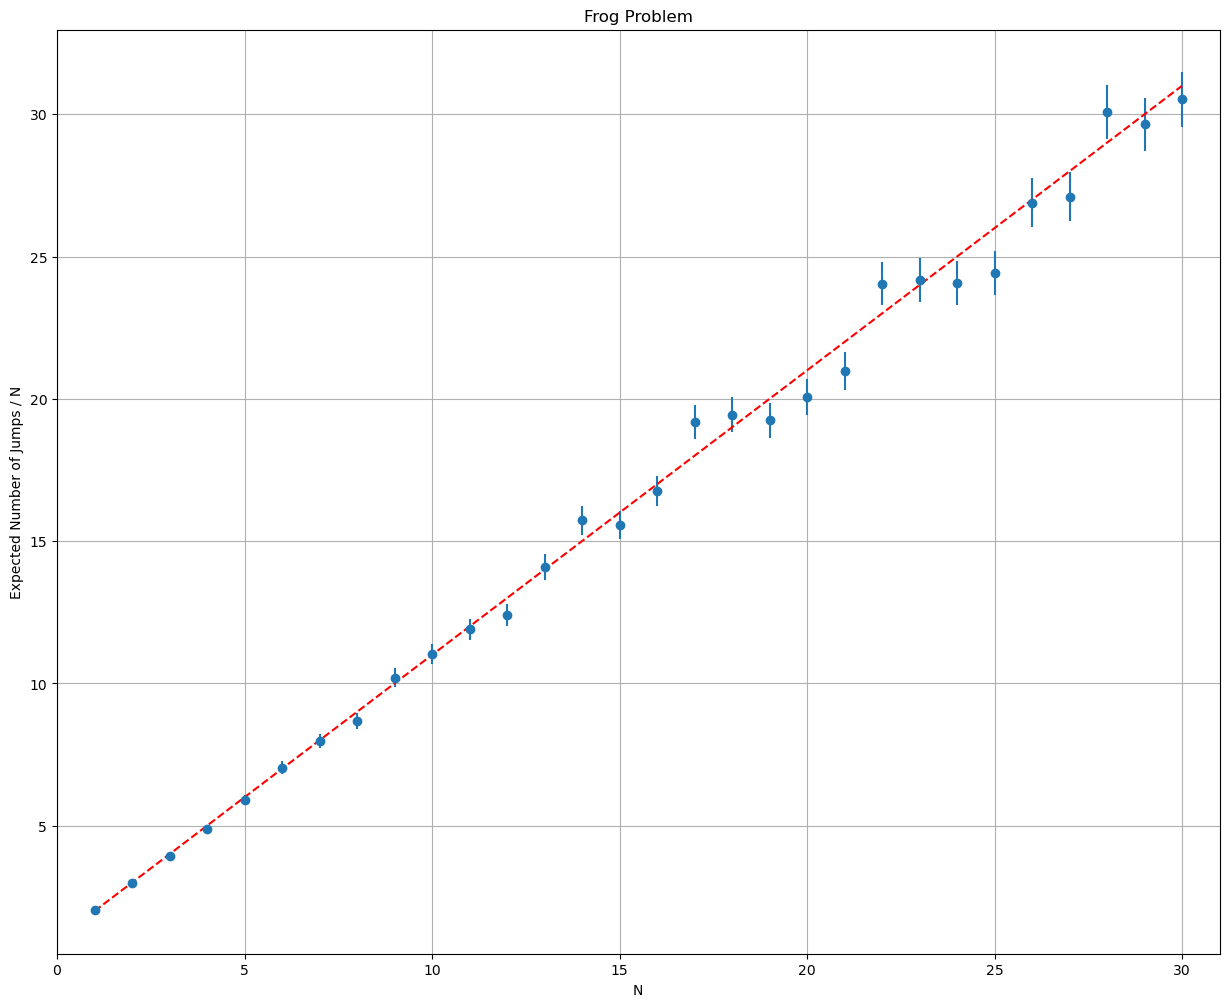

In [12]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,np.array(x)+1,'r--')
#ax1.plot(x,evalr,'r--')
#ax1.plot(x,evalh,'g--')

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,nmax+1)
ax1.grid(True)


In [13]:
# It looks like the average number of jumps is around n + 1

# Do the check with 30 lily pads

npad = 30
end = npad

njumps = []
    
# simulate the process of getting across the stream n_trys times
for j in range(n_trys):

    # main simulation loop
    while pos < npad:
        jump = int(random.uniform(-pos,(end-pos+1)))
        pos = pos + jump
        jumpsum = jumpsum + 1

    # reset pos to zero, add to total jumps, reset jumpsum
    njumps.append(jumpsum)
    pos = 0
    total_jumps = total_jumps + jumpsum
    jumpsum = 0

#print (npad,total_jumps,n_trys)

expectation_value = total_jumps/n_trys*1.0
y.append(expectation_value)
sigma.append(expectation_value*1/np.sqrt(n_trys))
total_jumps = 0

print ("Expectation value for n = %d is %f +/- %f" % (npad,expectation_value,expectation_value*1/np.sqrt(n_trys)))

Expectation value for n = 30 is 32.029000 +/- 1.012846


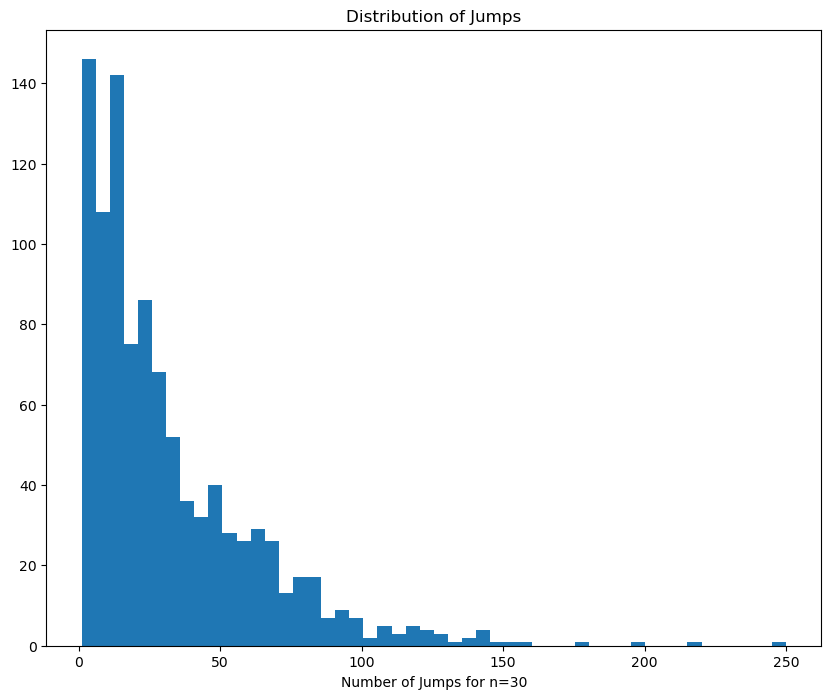

In [14]:
# Plot histogram of jumps

fig = plt.figure()

plt.hist(njumps, bins=50)
plt.xlabel("Number of Jumps for n=30")
plt.title("Distribution of Jumps")
plt.show()

Is the average number of jumps being N+1 surprising? A little bit. However, when you think about it a bit more, you realize the probability of jumping to any position from any position is about 1/N. I don't have a strong mathematical way to make it make sense, but I'm able to accept it.

## Question 3 - Real Experiment Analysis:  2016 Mazda CX-5 ODB Data

My current vehicle is a 2016 Mazda CX-5.  I purchased an ODB reader unit earlier this year, in order to diagnose the sources of a "Check Engine Light" situation.  In once instance last August, I recorded some data using the ODB reader, and then exported this data into a CSV file, in the format the the ODB reader manufacturer specified.   You can find that data file in ~/JupyterNotebooks/ODB/Mazda_CX5_2016_08122022.csv

I have provided a VERY basic Jupyter Notebook that illustrates how to read this data file into a Pandas dataframe, look at the format of data, and then how to extract a particular PID signal from the data and plot it.

The task for this question is for you to look at ALL of the data recorded, and then create plots of quantities that you think might be useful or interesting, as a function of recording time.  In particular, it should be interesting to look at the CORRELATIONS between various PID signals.  That is, Incidentally, the Check Engine code that was thrown that sent me down the path was related to an under-performing catalytic converter.  This is why I recorded data for the upstream and downstream oxygen sensors, and the catalytic converter temperature.

This is an open-ended task, and there is no right answer here!  The point is for you to exercise your sense of creativity, together with your knowledge of data analysis techniques that you may have learned in this course, other courses, or through other experiences.

In [15]:
# Read in the file
df = pd.read_csv('/Users/jakebuchanan/code/phys421/JupyterNotebooks/ODB/Mazda_CX5_2016_08122022.csv',delimiter=';')
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18498 entries, 0 to 18497
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SECONDS     18498 non-null  float64
 1   PID         18498 non-null  object 
 2   VALUE       18498 non-null  float64
 3   UNITS       15099 non-null  object 
 4   LATITUDE    18498 non-null  float64
 5   LONGTITUDE  18498 non-null  float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 1011.7+ KB


,SECONDS,PID,VALUE,UNITS,LATITUDE,LONGTITUDE,Unnamed: 6
0,61163.575861,Altitude (GPS),90.040106,feet,37.255327,-76.736260,NaN
1,61164.066861,Altitude (GPS),91.049061,feet,37.255327,-76.736260,NaN
2,61164.066861,Average speed (GPS),0.000000,mph,37.255327,-76.736260,NaN
3,61164.066861,Speed (GPS),0.000000,mph,37.255327,-76.736260,NaN
4,61164.151861,Altitude (GPS),91.049061,feet,37.255099,-76.735947,NaN
...,...,...,...,...,...,...,...
95,61217.612861,Catalyst temperature Bank 1 Sensor 1,227.120000,℉,37.255337,-76.736099,NaN
96,61217.612861,Oxygen sensor 1 Wide Range Current (mA),0.000000,mA,37.255337,-76.736099,NaN
97,61217.612861,Oxygen sensor 1 Wide Range Equivalence ratio,14.718882,NaN,37.255337,-76.736099,NaN
98,61217.612861,Oxygen sensor 2 Bank 1 Short term fuel trim,0.000000,%,37.255337,-76.736099,NaN


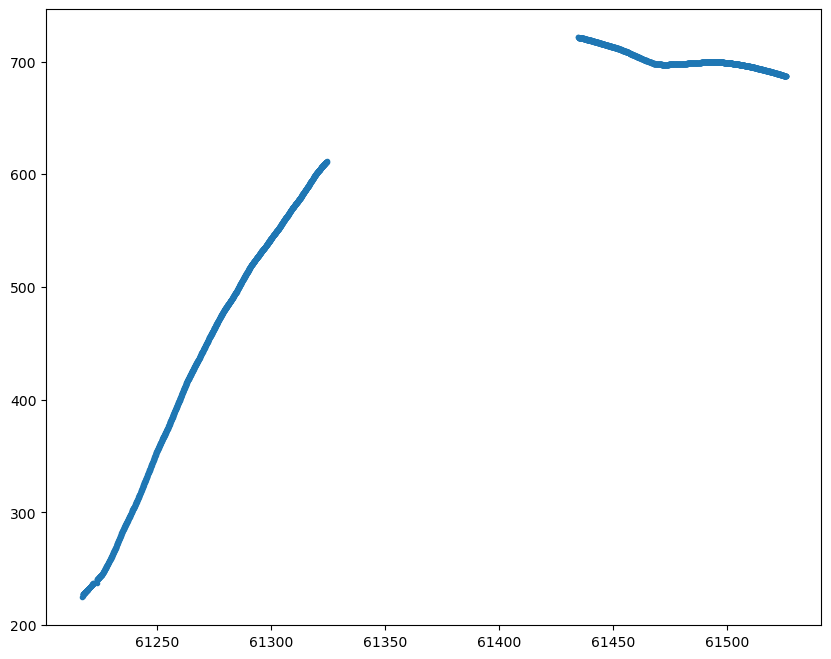

In [16]:
# Plot something! Starting with the temperature of the catalytic converter...
df2 = df.loc[df['PID'] == 'Catalyst temperature Bank 1 Sensor 1']

fig = plt.figure()
plt.plot(df2['SECONDS'], df2['VALUE'],'.')

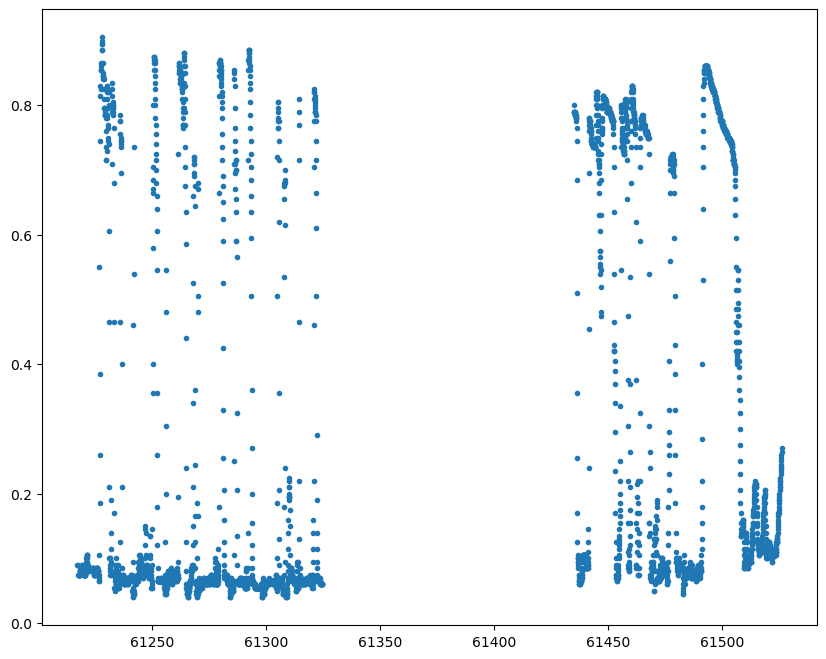

In [17]:
# There's a pretty large increase here, so I looked up catalyst temperature and found a PID error code
# The code being: P0428 Catalyst Temperature Sensor High (Bank 1, Sensor 1)
# And some info on it is on this website: https://www.chiptuners.in/obd-codes/p0428-catalyst-temperature-sensor-high-bank-1-sensor-1/

# This website said to check the voltage of the oxygen sensor
df3 = df.loc[df['PID'] == 'Oxygen sensor 2 Bank 1 Voltage']

fig = plt.figure()
plt.plot(df3['SECONDS'], df3['VALUE'],'.')

(61475.0, 61530.0)

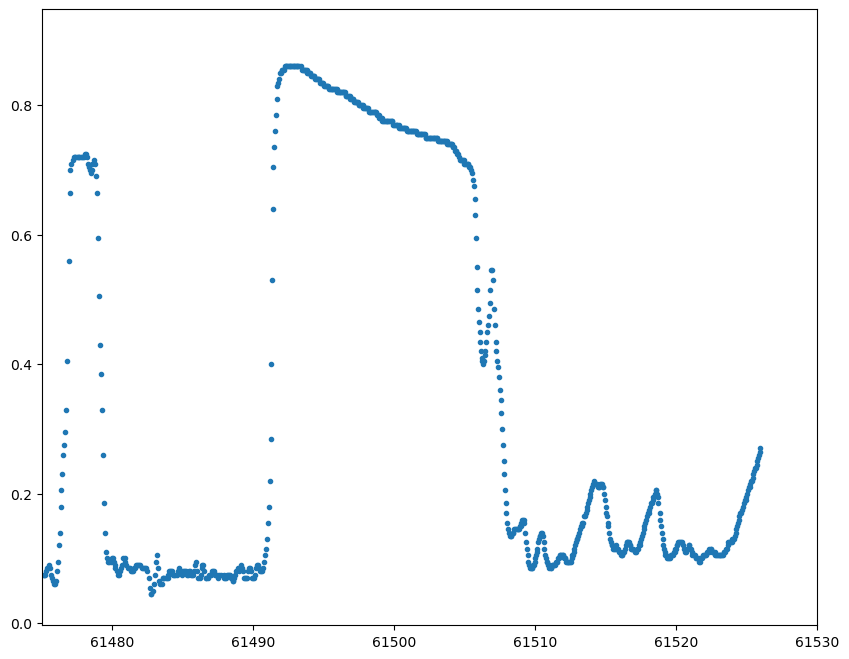

In [18]:
# I'm not sure where the gap comes from in the middle of these plots, but the later group of data is the interesting one
# (in my opinion, at least)... The website I was looking said that the voltage as plotted above should rapidly bounce
# between 0.1 to 0.9 volts or so. If the change is slow, then it'll cause problems with the catalytic converter temperature.

# Let's isolate the time where this is relevant (around 61475 seconds onwards)
fig = plt.figure()
plt.plot(df3['SECONDS'], df3['VALUE'],'.')
plt.xlim(61475,61530)

The oscillations definitely look slow, so my guess is that the O2 sensor needs fixing!